In [355]:
import sklearn
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.interpolate import griddata, Rbf
%matplotlib inline

## Putting Data in Lists

In [356]:
with open("E:\Oubaid\Geol-Geoph\MR2-G²\sem1\Infographie geophysique\Projet Interpolation\Demogrid.dat", "r") as f:
    data = f.readlines()
    
lines=[]
x=[]
y=[]
z=[]

#read lines of the file, append lines in a list of strings inside "lines".
for i in data:
    lines.append(i.strip("\n"))
f.close()
lines.pop(0)

#seperate x, y and z in 3 differents lists, and convert them to floats at the same time
for j in lines:
    x.append(float(j.split(',')[0]))
    y.append(float(j.split(',')[1]))
    z.append(float(j.split(',')[2]))
    
#convert lists to arrays
x = np.array([x])
y = np.array([y])
z = np.array([z])

print(lines,"\n","\n")
print(x,"\n")
print(y,"\n")
print(z,"\n")
print(x.shape, y.shape, z.shape)
print(x.max(),y.max(),z.max())

['0.1,0,90', '3.5,0,45', '4.9,0,65', '6.2,0,40', '7,0,55', '9,0,25', '9,5,55', '9,3,48', '9,7,45', '6.5,7,75', '4.5,7,50', '2.9,7,75', '1.3,7,52', '0,7,70', '0,4.1,90', '0,2.1,105', '1.7,5.6,75', '2.2,4.5,66', '2.5,3.6,60', '2.9,2.4,55', '3.2,1.1,50', '1.6,6.6,60', '4.7,1,66', '4.6,1.6,70', '4.5,2.5,80', '4.6,3.6,95', '4.5,4.2,80', '4.3,5.1,70', '4.4,6,60', '5.3,5.3,78', '6,5.7,88', '6.9,5.6,102', '7.1,5,104', '7,3.5,90', '6.9,2.7,80', '6.9,1.9,70', '7,0.6,60', '6,1,51', '6,2,54', '5.9,3,60', '6,4,64', '6.3,4.8,71', '3,6,75', '4,4.5,75', '5,4.5,73', '0.6,5,80', '1.8,2,70'] 
 

[[0.1 3.5 4.9 6.2 7.  9.  9.  9.  9.  6.5 4.5 2.9 1.3 0.  0.  0.  1.7 2.2
  2.5 2.9 3.2 1.6 4.7 4.6 4.5 4.6 4.5 4.3 4.4 5.3 6.  6.9 7.1 7.  6.9 6.9
  7.  6.  6.  5.9 6.  6.3 3.  4.  5.  0.6 1.8]] 

[[0.  0.  0.  0.  0.  0.  5.  3.  7.  7.  7.  7.  7.  7.  4.1 2.1 5.6 4.5
  3.6 2.4 1.1 6.6 1.  1.6 2.5 3.6 4.2 5.1 6.  5.3 5.7 5.6 5.  3.5 2.7 1.9
  0.6 1.  2.  3.  4.  4.8 6.  4.5 4.5 5.  2. ]] 

[[ 90.  45.  65.  40

## Grid DATA

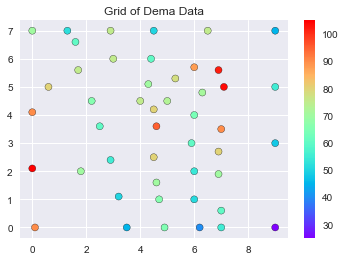

In [357]:
#scatter plot the values of z, where x is the xaxis and y is the yaxis
#plt.axvline(5, c=(.5, .5, .5), ls="--")
#plt.axhline(5, c=(.5, .5, .5), ls="--")
plt.scatter(x, y, c=z, cmap="rainbow", edgecolor='k')
plt.style.use("seaborn")
plt.colorbar(orientation="vertical")
plt.title('Grid of Dema Data')
plt.axis(x="Latitude", y="Longitude")
plt.show()

## Spline Linear Interpolation

C:\Users\dell\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,8 m=47 fp=83.705245 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


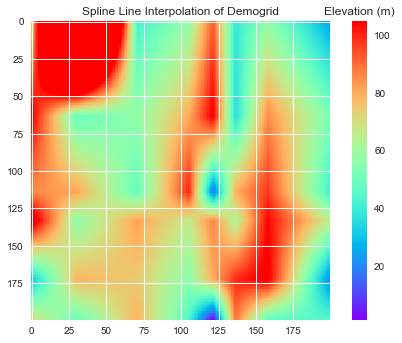

In [359]:
#do the interpolation of the z data
f = interpolate.interp2d(x=x, y=y, z=z, kind="linear")

#create the projection grid
#grid = np.mgrid[x.min():x.max(),y.min():y.max()]
xnew = np.linspace(x.min(), x.max(), num=200)
ynew = np.linspace(y.min(), y.max(), num=200)
#apply the interpolation in the created grid
LinearInterpolation = f(xnew, ynew)

# plot
plt.imshow(LinearInterpolation, cmap="rainbow")
plt.title('Spline Line Interpolation of Demogrid')
plt.style.use("seaborn")
plt.colorbar(orientation="vertical").ax.set_title('Elevation (m)')
plt.axis(x="Latitude", y="Longitude")
plt.show()